In [2]:
import pandas as pd
roadaccident=pd.read_csv('/content/encoded_data.csv')
print("Shape of the dataset:",roadaccident.shape)
roadaccident.head()

Shape of the dataset: (12316, 25)


,Unnamed: 0,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,0,1,0,1,0,0,0,0,3,9,...,3,2,3,2,3,2,5,3,5,9
1,1,1,1,1,4,0,3,11,3,6,...,3,2,8,2,3,2,5,3,5,16
2,2,1,0,1,4,0,0,5,3,1,...,3,2,2,2,0,1,1,2,5,0
3,3,3,0,1,4,0,2,11,0,6,...,0,2,8,2,2,0,0,2,5,1
4,4,3,0,1,4,0,1,0,3,4,...,0,2,8,2,3,2,5,3,5,16


In [4]:
import pandas as pd
roadaccident=pd.read_csv('/content/encoded_data.csv')
data=roadaccident.loc[:,['Driving_experience','Casualty_severity']]
data.head(15)

,Driving_experience,Casualty_severity
0,0,3
1,3,3
2,0,2
3,2,2
4,1,3
5,2,2
6,1,2
7,1,3
8,3,2
9,0,2


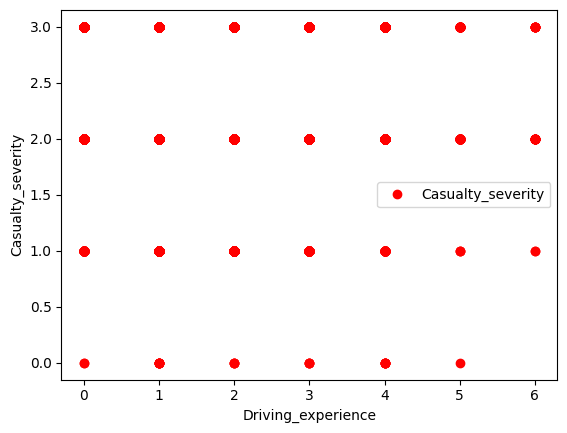

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
roadaccident=pd.read_csv('/content/encoded_data.csv')
roadaccident.plot(x='Driving_experience' ,y='Casualty_severity' ,style='ro')
plt.xlabel('Driving_experience')
plt.ylabel('Casualty_severity')
plt.show()

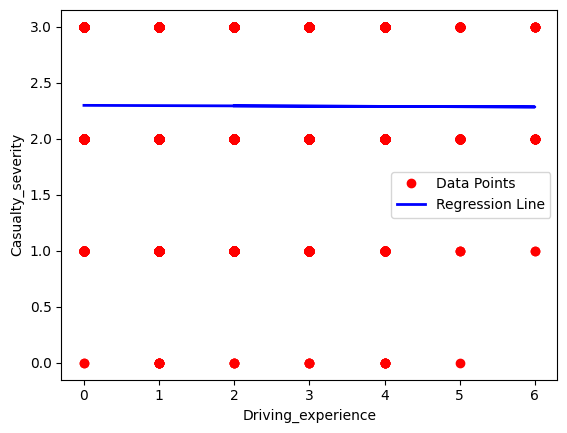

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
roadaccident=pd.read_csv('/content/encoded_data.csv')
x=roadaccident[['Driving_experience']]
y=roadaccident[['Casualty_severity']]
regressor=LinearRegression()
regressor.fit(x, y)
roadaccident.plot(x='Driving_experience', y='Casualty_severity', style='ro', label='Data Points')
plt.plot(x, regressor.predict(x), color='blue', linewidth=2, label='Regression Line')
plt.xlabel('Driving_experience')
plt.ylabel('Casualty_severity')
plt.legend()
plt.show()

In [10]:
import pandas as pd
roadaccident=pd.read_csv('/content/encoded_data.csv')
x=pd.DataFrame(data['Driving_experience'])
y=pd.DataFrame(data['Casualty_severity'])

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
roadaccident=pd.read_csv('/content/encoded_data.csv')
x=pd.DataFrame(data['Driving_experience'])
y=pd.DataFrame(data['Casualty_severity'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9852, 1)
(2464, 1)
(9852, 1)
(2464, 1)


In [13]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
print(regressor.intercept_)

[2.29511359]


In [16]:
print(regressor.coef_)

[[-0.00018031]]


In [17]:
y_pred=regressor.predict(x_test)
y_pred

array([[2.29475297],
       [2.29493328],
       [2.29457266],
       ...,
       [2.29493328],
       [2.29493328],
       [2.29475297]])

In [18]:
y_test.head(15)

,Casualty_severity
10974,2
5748,2
4941,2
11832,2
8173,3
5453,3
7491,2
3728,3
1070,3
9124,2


In [20]:
from sklearn import metrics
import numpy as np
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.5107782703285619
Mean Squared Error (MSE): 0.3482019918057483
Root Mean Squared Error (RMSE): 0.5900864274034341


In [21]:
import joblib
import pickle
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x, y)
joblib.dump(model, 'linear_regression_model.pkl')
with open('linear_regression_model.pkl', 'wb') as file: pickle.dump(model, file)

In [22]:
import joblib
import numpy as np
import pandas as pd
new_x=np.array([12, 13, 14, 15, 16]).reshape(-1, 1)
model=joblib.load('linear_regression_model.pkl')
predictions=model.predict(new_x)
new_data=pd.DataFrame({'x':new_x.flatten(), 'Predicted_y': predictions.flatten()})
print(new_data)

    x  Predicted_y
0  12     2.270248
1  13     2.267894
2  14     2.265539
3  15     2.263184
4  16     2.260830


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
